# Problem Komiwojażera przy pomocy Algorytmów Genetycznych
## By Szymon Skrzypczyk ;)

In [1]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# beda jako parametry
# rozmiary 
# ilosc punktow n
# warunek koncowy
n = 50 
pop_size = 100
selected_items = 25
distance_threshold = 100
cross_prob = 0.8
mutation_prob = 0.2
selection_method = "ranking"  # "roulette"

In [3]:
cities = np.random.uniform(0, 300, (n, 2))
# dystans euklidesowski
calc_distance = lambda p1, p2: np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

calc_distance(cities[0], cities[1])

78.50105179498642

## Położenie miast na "mapie"

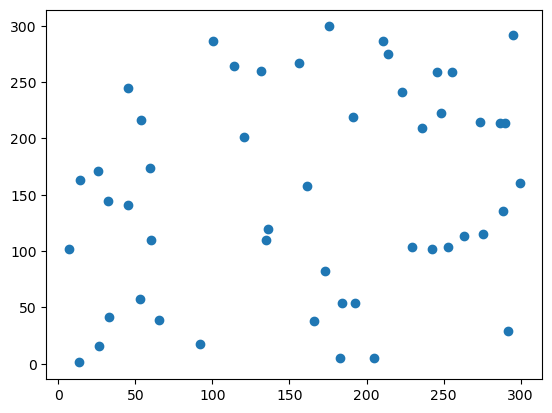

In [4]:
# do poprawy stylownia itd itd
plt.scatter(cities[:, 0], cities[:, 1])

## macierz dystansow miedzy miastami

In [5]:
# tablica odleglosci 
distances = []
for nx in range(n):
    distances_nx = []
    for mx in range(n):
        if mx == nx:
            distances_nx.append(np.nan)
        distances_nx.append(calc_distance(cities[nx], cities[mx]))
                            
    distances.append(distances_nx)

distances = pd.DataFrame(distances)

In [6]:
population = np.array([np.random.permutation(distances.index) for _ in range(pop_size)])
population

array([[10,  8,  6, ..., 31, 18, 40],
       [11,  1,  8, ..., 44, 42, 25],
       [12, 49,  4, ...,  2, 34,  8],
       ...,
       [26, 38, 35, ...,  5, 33, 40],
       [11, 35, 29, ..., 33, 31, 44],
       [28, 49, 19, ..., 22,  9, 17]], dtype=int64)

## Operatory genetyczne

In [7]:
def mutate(pop_list):
    pop_el = pop_list.copy()
    # phase 1
    exchange_element_1 = randint(0, n)
    exchange_element_2 = randint(0, n)

    # can't swap the same element, but they will be distinct by definition
    # while exchange_element_2 == exchange_element_1:
    #    exchange_element_2 = randint(0, n)
    
    pop_el[exchange_element_1], pop_el[exchange_element_2] = pop_el[exchange_element_2], pop_el[exchange_element_1]

    # Phase 2
    exchange_start = randint(0, n - 2) 
    exchange_end = randint(exchange_start + 2, n) 
    # the index cannot be larger than the actual array
    exchange_end = min(exchange_end, len(pop_el))  

    el_start = pop_el[exchange_start]
    pop_el = np.delete(pop_el, exchange_start)
    pop_el = np.insert(pop_el, exchange_end, el_start) 

    return pop_el 

mutate(population[9])

array([36, 16, 39, 23, 43, 11,  5,  7, 31,  8, 33,  9, 25, 13, 38, 24, 21,
       29, 12, 19, 47, 46, 18, 42, 37,  4,  0, 40, 35, 22,  3, 10,  2, 32,
       15, 14, 20, 26,  1, 45, 30, 17, 44,  6, 27, 34, 48, 49, 28, 41],
      dtype=int64)

In [14]:
def crossover(parent1, parent2):
    child = np.full(n, -1) 

    exchange_start = randint(0, n - 1) 
    exchange_end = randint(exchange_start + 1, n)  

    # assign crossover elements
    child[exchange_start:exchange_end] = parent1[exchange_start:exchange_end]

    # genes that have already been added
    added_genes = child[exchange_start:exchange_end]
    # position of next entry
    child_index = 0

    for gene in parent2:
        if gene not in added_genes:  
            while child_index < n and child[child_index] != -1:
                child_index += 1
            if child_index < n:
                child[child_index] = gene

    return child


crossover(population[1], population[2])

array([10, 48,  1, 46, 29, 20, 15,  5, 40,  3, 38, 39, 18, 13, 24, 12,  9,
       14, 30,  4,  7, 28, 27, 33, 43, 49, 23, 41, 19, 37, 31,  0, 35, 17,
       26, 25, 11, 44, 21, 42, 22, 16,  6, 32, 47, 36, 45,  2, 34,  8])

In [15]:
def calculate_distance_chromosome(chromosome):
    total = 0 
    for start_el, next_el in zip(range(n-1), range(1, n)):
        # print(start_el, next_el, distances.iloc[chromosome[start_el], chromosome[next_el]])
        total += distances.iloc[chromosome[start_el], chromosome[next_el]]

    return total


calculate_distance_chromosome(population[5])

9199.207444017742

In [10]:
def selection_roulette(all_chromosomes, select_count=selected_items):
    summed = np.array([calculate_distance_chromosome(chromosome) for chromosome in all_chromosomes])
    probabilities = 1 / summed
    probabilities /= np.sum(probabilities)

    selected_indexes = np.random.choice(len(all_chromosomes), select_count, p=probabilities)
    
    result = np.zeros((select_count, all_chromosomes.shape[1]))
    for idx, selected_index in enumerate(selected_indexes):
        result[idx, :] = all_chromosomes[selected_index, :]

    return result

selection_roulette(population)

array([[30., 40., 24., ..., 26., 17., 12.],
       [26., 44., 32., ...,  0., 10., 45.],
       [30., 28., 15., ...,  1., 11., 42.],
       ...,
       [41., 36.,  4., ..., 44., 11., 23.],
       [41., 33.,  0., ...,  3.,  1., 26.],
       [23., 12., 34., ..., 31., 17., 46.]])

In [11]:
def selection_ranking(all_chromosomes, select_count=selected_items):
    summed = np.array([calculate_distance_chromosome(chromosome) for chromosome in all_chromosomes])
    selected_indexes = np.argsort(summed)[:select_count]

    result = np.zeros((select_count, all_chromosomes.shape[1])) 
    for idx, selected_index in enumerate(selected_indexes):
        result[idx, :] = all_chromosomes[selected_index, :]

    return result

selection_ranking(population)

array([[19.,  4., 23., ..., 44., 15., 21.],
       [21., 37., 46., ...,  1., 41., 36.],
       [ 1.,  5., 12., ..., 29., 19.,  0.],
       ...,
       [27., 44., 34., ..., 10.,  1., 15.],
       [16.,  0., 29., ..., 22., 11., 40.],
       [28., 37., 48., ..., 18., 34., 30.]])